In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
def starbucks(pre_seas, op_mkt, proc, dem, mkt_price):
    # sales (demand)
    sales = dem
    # sourcing
    b_contr = sales * pre_seas['act_v']
    b_open = sales - b_contr
    # sourcing
    bean_cont = sales * pre_season['act_v']
    bean_out = sales - bean_cont
    # roasting & processing
    roast_ih = min(processing['cap_in_house'],sales)
    roast_out = max(sales-roast_ih,0)
    # revenues
    revenues = sales * mkt_price
    # costs
    src_cost = pre_season['price'] * bean_cont + op_mkt * bean_out
    fixed_cost = processing['fixed_c']
    roast_ih_cost = processing['in_house_var'] * roast_ih
    roast_out_cost = processing['outs_var'] * roast_out
    profit = revenues - src_cost - fixed_cost - roast_ih_cost - roast_out_cost
#     print(roast_ih, roast_out)
#     print("Revenue:", revenues)
#     print("Sourcing cost:", src_cost)
#     print("Fixed cost", fixed_cost)
#     print("In-house roasting variable cost:", roast_ih_cost)
#     print("Outsourcing variable cost:", roast_out_cost)
#     print("Profit", profit)
    return profit

In [4]:
pre_season = {'min_v':.4, 'max_v':.7, 'act_v':.6, 'price':1.5}
# open_mkt = {'min_p':.5, 'max_p':3, 'act_p':1.75}
open_mkt_actual = 1.75
processing = {'fixed_c':100000000, 'cap_in_house':200000000, 'in_house_var':4.3, 'outs_var':5.3}
demand = 215000000
market_p = 11

In [5]:
prof = starbucks(pre_season, open_mkt_actual, processing, demand, market_p)
print(prof)

981500000.0


In [6]:
l = .5
r = 3
m = 2.5
open_mkt_price_dist = np.random.triangular(l, m, r, 10000)

In [7]:
# Question 1
prof_dist = []
for i in range(len(open_mkt_price_dist)):
    prof_dist.append(starbucks(pre_season, open_mkt_price_dist[i], processing, demand, market_p)/1000000)

In [8]:
# Question 2
mean = np.mean(prof_dist)
median = np.median(prof_dist)
stdev = np.std(prof_dist)
eightieth_perc = np.percentile(prof_dist, 80)
print("Mean =", mean)
print("Standard deviation =", stdev)
print("Median", median)
print("80th percentile", eightieth_perc)

Mean = 960.1087584341611
Standard deviation = 46.34078556946259
Median 953.3763386636446
80th percentile 1003.232659034796


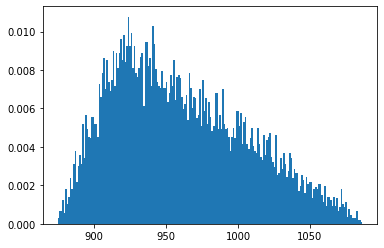

In [9]:
h = plt.hist(prof_dist, bins=200, density=True)

In [10]:
probB = sum(i>1000 for i in prof_dist) / len(prof_dist)
print(probB)

0.2173


In [28]:
# Question 4
dist0vals = [.75, 1.5, 2.0, 2.75]
dist0probs = [.1, .3, .4, .2]
dist0 = np.random.choice(dist0vals, 10000, dist0probs)

prof_dist0 = []
for i in range(len(dist0)):
    prof_dist0.append(starbucks(pre_season, dist0[i], processing, demand, market_p)/1000000)
mean = np.mean(prof_dist0)
median = np.median(prof_dist0)
stdev = np.std(prof_dist0)
eightieth_perc = np.percentile(prof_dist0, 80)
print("Mean =", mean)
print("Standard deviation =", stdev)
print("Median", median)
print("80th percentile", eightieth_perc)

Mean = 980.87865
Standard deviation = 62.55230850398329
Median 960.0
80th percentile 1067.5


In [38]:
# Question 5
hist_data = "sb_hist_prices.csv"
with open(hist_data, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    # get header from first row
    headers = next(reader)
    # get all the rows as a list
    data = list(reader)
    # transform data into numpy array
    data = np.array(data).astype(object)
# print(headers)
for a in range(len(data)):
    data[a] = float(data[a])
# print(data)

In [39]:
dist2 = []
dist2
prof_dist2 = []
for i in range(len(dist2)):
    prof_dist2.append(starbucks(pre_season, dist2[i], processing, demand, market_p)/1000000)

In [40]:
mean = np.mean(prof_dist2)
median = np.median(prof_dist2)
stdev = np.std(prof_dist2)
eightieth_perc = np.percentile(prof_dist2, 80)
print("Mean =", mean)
print("Standard deviation =", stdev)
print("Median", median)
print("80th percentile", eightieth_perc)
# h = plt.hist(prof_dist2, bins=20, density=True)

IndexError: cannot do a non-empty take from an empty axes.

In [32]:
# Question 6
l = .5
r = 3
m = 2.5
open_mkt_price_dist = np.random.triangular(l, m, r, 500)
dem_dist = np.random.normal(215000000, 30000000, 500)
prof_dist3 = []
for i in range(len(open_mkt_price_dist)):
    for j in range(len(dem_dist)):
        prof_dist3.append(starbucks(pre_season, open_mkt_price_dist[i], processing, dem_dist[j], market_p)/1000000)

In [33]:
mean = np.mean(prof_dist3)
median = np.median(prof_dist3)
stdev = np.std(prof_dist3)
eightieth_perc = np.percentile(prof_dist3, 80)
print("Mean =", mean)
print("Standard deviation =", stdev)
print("Median", median)
print("80th percentile", eightieth_perc)
# h = plt.hist(prof_dist3)

Mean = 956.440008593405
Standard deviation = 141.11390682224976
Median 958.7344122590434
80th percentile 1071.4088830741416
